## Question 2 [L-fold Cross Validation, 15 Marks]

### I. Implement a L-Fold Cross Validation (CV) function for your	 KNN regressor: 
              cv(train.data, train.label, numFold=10)
            
which takes	the	training data and their	labels (continuous values), the number of folds, and returns errors	for	different folds	of the training data.

In [1]:
# Import library
library(ggplot2)
library(reshape2)
library(corrplot)

# Load data
data2.train <- read.csv('./Task1A_train.csv')
data2.train <- as.matrix(data2.train)

In [2]:
# Define the average function for KNN regression
avg <- function(x) {
  round(mean(x),2)
}

In [3]:
# Refer to tutorial code 
# KNN function (Use euclidean distance here)

knn <- function(train.data, train.label, test.data, test.label, K=3){
  
  test.label1 <- test.label
  ## count number of train samples
  train.len <- nrow(train.data)
  
  ## count number of test samples
  test.len <- nrow(test.data)
  
  ## calculate distances between samples
  dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
  
  ## for each test sample...
  for (i in 1:test.len){
    ### ...find its K nearest neighbours from training sampels...
    nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
    ###... and calculate the predicted labels according to the mean value of K neighbours
    test.label1[i]<- avg(train.label[nn])
  }
  
  ## return the class labels as output
  return (as.matrix(test.label1))
}

In [4]:
# L-fold Cross Validation
cv <- function(train.data, train.label, numFold=10, K=3) {
    
  # Create L equal-size subsets
  folds <- cut(seq(1,nrow(train.data)),breaks=10,labels=FALSE)
  
  # Create a vector for MSE of L-fold 
  mse.lf <- rep(0,numFold)
  
  # Perform L-fold cross validation
  for(i in 1:numFold){
      
    #Divide the data by folds
    test_index <- which(folds==i,arr.ind=TRUE)
    test_data <- train.data[test_index,,drop=FALSE ]
    test_lable <- train.label[test_index,,drop=FALSE ]
    train_data <- train.data[-test_index,,drop=FALSE  ]
    train_label <- train.label[-test_index,,drop=FALSE ]
      
    #Perform KNN regressor for each fold.
    mse <- sum((knn(train_data,train_label, test_data,test_lable,K=K)-test_lable)^2)/nrow(test_data)

    #Store MSE in ith postion of L fold MSE array.
    mse.lf[i] <- mse
  }
  return(mse.lf)
}

## II. Using the training data, run your L-Fold CV where the numFold is set to 10. 
Change the value of K=1,..,20 in your KNN regressor, and for each K compute the average 10 error numbers you have got. Plot the average error numbers versus 1/K for K=1,..,20 in your KNN regressor. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Save the plot in your Jupyter Notebook file for Question 2.

In [5]:
# Randomly shuffle the data
set.seed(1111)
data2.train <- data2.train[sample(nrow(data2.train)),]

# Create training set and training label
data2.train.data <- data2.train[, -2,drop=FALSE] # grab records, leave out the y (last column)
data2.train.label <- data2.train[, 2,drop=FALSE]

In [6]:
# Use temp dataframe to store average of MSE of each K 
temp <- data.frame('K'=1:20, 'AvgMSE'=rep(0,20))
for (k in 1:20){
  temp[k,2] <- mean(cv(data2.train.data, data2.train.label,K=k))   # mean of error
}

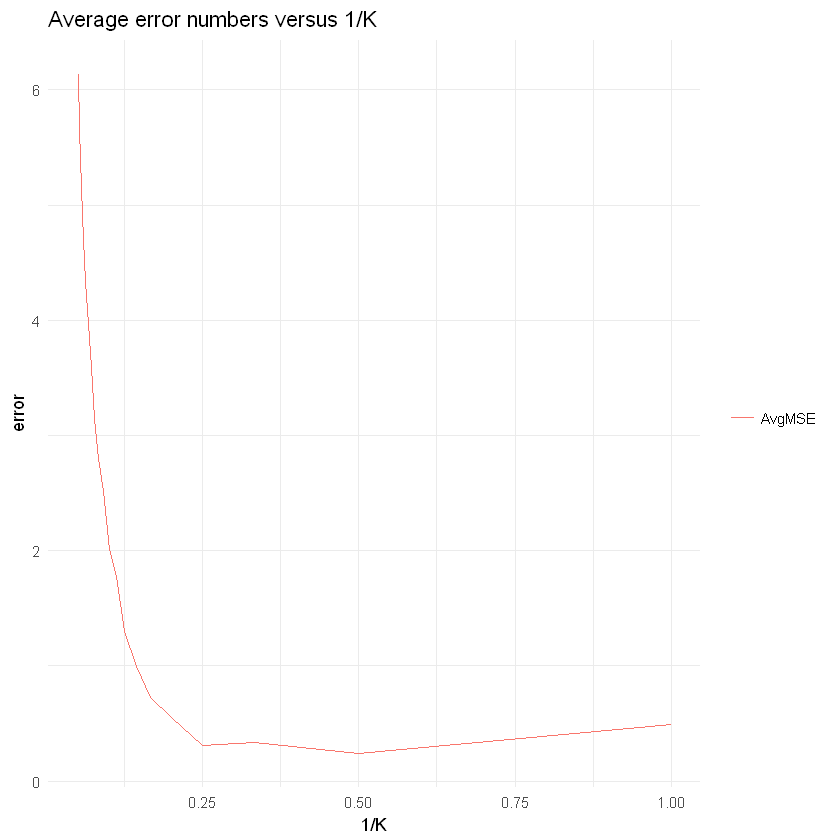

In [7]:
# Reshape datafram for visualization
temp.m <- melt(temp, id='K') 
names(temp.m) <- c('K', 'type', 'error')
ggplot(data=temp.m, aes(x=1/K, y=error, color=type))+ geom_line() +
              scale_color_discrete(guide = guide_legend(title = NULL)) + 
                ggtitle("Average error numbers versus 1/K") + theme_minimal()

### III. Report (in your Jupyter Notebook file) the values of K that result to minimum average error and minimum standard deviation of errors based on your cross validation plot in the previous part (Part II).

#### Ans:
From the plot we can learn that when **1/K** equals to **0.5**, the average error reaches the minimum. Therefore the **K** is equal to 2.